Velocidad
[ 0.          0.0981      0.19619984  0.29429919  0.39239772  0.49049511
  0.58859104  0.68668517  0.78477718  0.88286675  0.98095355  1.07903725
  1.17711753  1.27519406  1.37326652  1.47133458  1.56939792  1.6674562
  1.76550911  1.86355632  1.9615975   2.05963233  2.15766049  2.25568164
  2.35369546  2.45170164  2.54969983  2.64768973  2.745671    2.84364332
  2.94160636  3.03955981  3.13750333  3.23543661  3.33335931  3.43127113
  3.52917172  3.62706077  3.72493796  3.82280296  3.92065546  4.01849511
  4.11632161  4.21413464  4.31193386  4.40971896  4.50748962  4.60524551
  4.70298631  4.80071171  4.89842137  4.99611498  5.09379222  5.19145277
  5.28909631  5.38672252  5.48433107  5.58192165  5.67949394  5.77704762
  5.87458237  5.97209788  6.06959382  6.16706987  6.26452572  6.36196106
  6.45937555  6.5567689   6.65414077  6.75149086  6.84881884  6.9461244
  7.04340723  7.14066701  7.23790343  7.33511616  7.43230491  7.52946934
  7.62660915  7.72372403  7.82081366  7.917

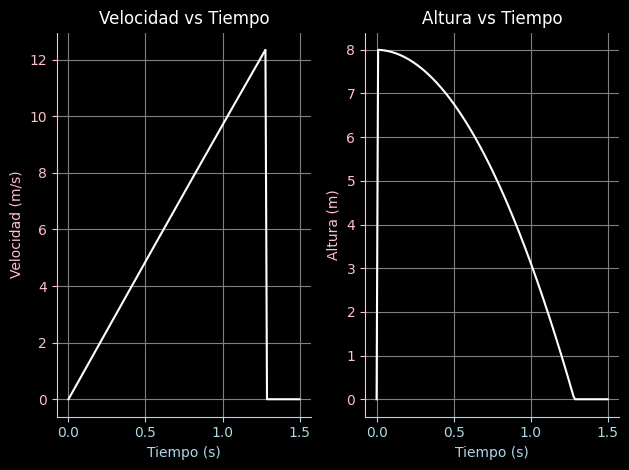

In [1]:
import numpy as np
import matplotlib.pyplot as plt

m = 0.60  # masa (Kg)
Cd = 0.47  # Coeficiente de arrastre para esfera
rho = 1.225  # Densidad del aire (Kg/m^3)
A = 0.00353  # Área transversal de la esfera (m^2)
g = 9.81  # Constante de aceleración de la gravedad en (m/s^2)
dt = 0.01  # paso de tiempo (s)
t_total = 1.5  # Tiempo total de simulación (s)

def air_resistance(v):
    return 0.5 * Cd * rho * A * v**2

# Inicialización de variables
n_steps = int(t_total / dt)
velocidad = np.zeros(n_steps)
posicion = np.zeros(n_steps)
tiempo = np.linspace(0, t_total, n_steps)  # Ajusta a n_steps

# Condiciones iniciales
v = 0.0  # Velocidad inicial (m/s)
y = 8.0  # Altura inicial (m)

# Simulación con método de Euler
for i in range(1, n_steps):
    F_gravity = m * g
    F_resistance = air_resistance(v)
    a = (F_gravity - F_resistance) / m  # Aceleración neta
    v = v + a * dt
    y = y - v * dt
    if y <= 0:
        y = 0
        v = 0
    velocidad[i] = v
    posicion[i] = y

print("Velocidad")
print(velocidad)
print("Posicion")
print(posicion)
print("Tiempo")
print(tiempo)

# Personalización de la gráfica
plt.figure(facecolor='black')

plt.subplot(1, 2, 1)
plt.plot(tiempo, velocidad, label="Velocidad (m/s)", color='white')
plt.xlabel("Tiempo (s)", color='lightblue')
plt.ylabel("Velocidad (m/s)", color='pink')
plt.title("Velocidad vs Tiempo", color='white')
plt.grid(True, color='gray')
plt.gca().spines['bottom'].set_color('lightblue')
plt.gca().spines['left'].set_color('pink')
plt.gca().tick_params(axis='x', colors='lightblue')
plt.gca().tick_params(axis='y', colors='pink')
plt.gca().set_facecolor('black')

plt.subplot(1, 2, 2)
plt.plot(tiempo, posicion, label="Posición (m)", color='white')
plt.xlabel("Tiempo (s)", color='lightblue')
plt.ylabel("Altura (m)", color='pink')
plt.title("Altura vs Tiempo", color='white')
plt.grid(True, color='gray')
plt.gca().spines['bottom'].set_color('lightblue')
plt.gca().spines['left'].set_color('pink')
plt.gca().tick_params(axis='x', colors='lightblue')
plt.gca().tick_params(axis='y', colors='pink')
plt.gca().set_facecolor('black')

plt.tight_layout()
plt.show()
